# Cancer remission and tumor stability

In [1]:
%load_ext autoreload
import numpy as np
from agent_model_2 import *
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact
import seaborn as sns

%matplotlib inline

## Agent Model v2

* Equilateral triangle 2D lattice.
* Fixed position tumor cell and moving Natural Killers.
* Tumor cells has a 3 state life cycle plus a dead state.
* Rigid boundary conditions.
* Resource flux with fixed borders.
* Tumor growth as a function of available resources and space.

### Tumor cell

Tumor cells will follow a life cycle with 3 states as shown in the diagram below.

<img src="img/automata.png" style="max-width:500px">

* $S_0: $ correspond to the interphase, which includes states $G_1$, $S$ and $G_2$.
* $S_1: $ mitosis or M state, which usually last for 1/10 of $S_0$.
* $S_2: $ $G_0$ or resting state, induced for lack of resources or space to divide.
* $S_3: $ a cell that has gone through apoptosis (death).

In [4]:
N = 50
timesteps = 300

params = {
    "lattice_size": N,
    "difussion_coef": 0.9,
    "tumor_init_pos": N**2//2 + N//2,
    "tumorcell_consumption": 2,
    "tumorcell_mitosis_threshold": 8,
    "tumorcell_apoptosis_threshold": 20,
    "resources_init_min": 50,
    "resources_init_max": 100
}

hc = Tissue1(params)

for i in range(timesteps):
    hc.timestep()

In [5]:
interact(hc.plot_tissue, timestep=widgets.IntSlider(value=0, min=0, max=timesteps))

A Jupyter Widget

<function ipywidgets.widgets.interaction._InteractFactory.__call__.<locals>.<lambda>>

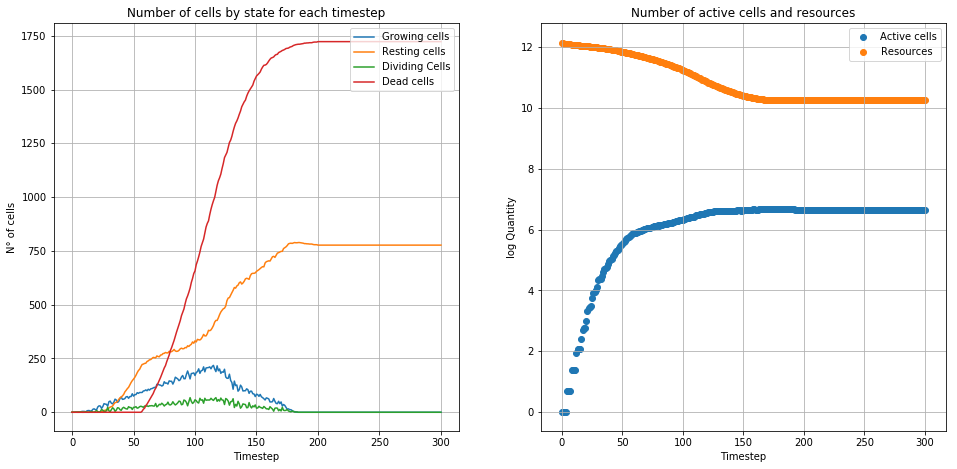

In [6]:
hc.plot_data()

### Resources deprivation scenario

In [2]:
N = 50
timesteps = 300

params = {
    "lattice_size": N,
    "difussion_coef": 0.9,
    "tumor_init_pos": N**2//2 + N//2,
    "tumorcell_consumption": 2,
    "tumorcell_mitosis_threshold": 8,
    "tumorcell_apoptosis_threshold": 20,
    "resources_init_min": 20,
    "resources_init_max": 50
}

hc = Tissue1(params)

for i in range(timesteps):
    hc.timestep()

KeyError: 'garbage_collector'

In [8]:
interact(hc.plot_tissue, timestep=widgets.IntSlider(value=0, min=0, max=timesteps))

A Jupyter Widget

<function ipywidgets.widgets.interaction._InteractFactory.__call__.<locals>.<lambda>>

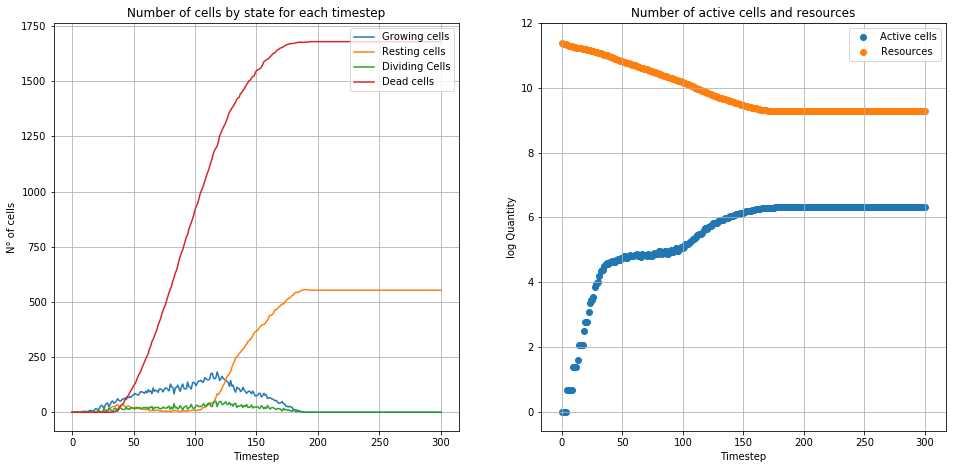

In [9]:
hc.plot_data()

### Natural Killer (NK) cell

* Moves over the centroids of each triangle in the tumor 2D lattice.
* Has a predefined chance of detecting a tumor cell and kill it.
* Secretes cytokines to attract more NK cells.

In [5]:
N = 51 # MUST BE ODD
timesteps = 500

params = {
    "lattice_size": N,
    "tumorcell_phagocytosis_rate": 0.05,
    "resources_difussion_coef": 0.7,
    "tumor_init_pos": 1301,
    "tumorcell_consumption": 2,
    "tumorcell_mitosis_threshold": 12,
    "tumorcell_apoptosis_threshold": 15,
    "resources_init_min": 100,
    "resources_init_max": 200,
    "cytokines_init_min": 2,
    "cytokines_init_max": 2,
    "cytokines_difussion_coef": 0.3,
    "nk_init_count": 100,
    "nkcell_movement_speed": 1,
    "nkcell_detection_probability": 0.7,
    "nkcell_cytokines_release": 15,
    "cytokines_decay": 0.1
}

t2 = Tissue2(params)

for i in range(timesteps):
    t2.timestep()

In [6]:
interact(t2.plot_tissue, timestep=widgets.IntSlider(value=0, min=0, max=timesteps))

A Jupyter Widget

<function ipywidgets.widgets.interaction._InteractFactory.__call__.<locals>.<lambda>>

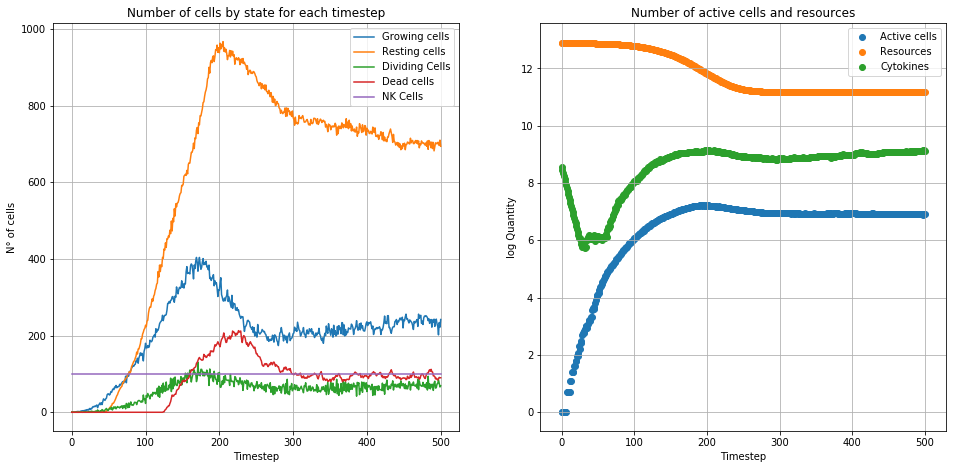

In [7]:
t2.plot_data()